In [ ]:
import zipfile

# Name of your ZIP file
zip_path = "noisy_trainset_28spk_wav.zip"

# Folder to extract contents to
extract_to = "noisy_trainset_wav"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")

Extraction complete.


In [ ]:
import zipfile

# Name of your ZIP file
zip_path = "clean_trainset_28spk_wav.zip"

# Folder to extract contents to
extract_to = "clean_trainset_wav"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(" Extraction complete.")

 Extraction complete.


In [ ]:
import os
print(os.listdir("noisy_trainset_wav"))

['noisy_trainset_28spk_wav']


In [ ]:
import os
print(os.listdir("clean_trainset_wav"))

['clean_trainset_28spk_wav']


In [ ]:
print(os.listdir("noisy_trainset_wav/noisy_trainset_28spk_wav")[:5])


['p226_001.wav', 'p226_002.wav', 'p226_003.wav', 'p226_004.wav', 'p226_005.wav']


In [ ]:
print(os.listdir("clean_trainset_wav/clean_trainset_28spk_wav")[:5])


['p226_001.wav', 'p226_002.wav', 'p226_003.wav', 'p226_004.wav', 'p226_005.wav']


C:\Users\USER\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


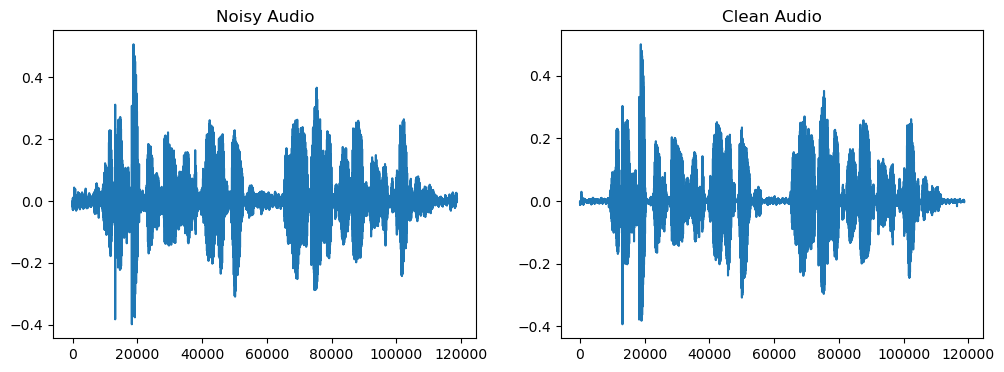

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Correct full paths to the .wav files
noisy_path = "noisy/noisy_trainset_28spk_wav/p226_005.wav"
clean_path = "clean/clean_trainset_28spk_wav/p226_005.wav"

# Load the audio
noisy_audio, sr = librosa.load(noisy_path, sr=16000)
clean_audio, _ = librosa.load(clean_path, sr=16000)

# Plot both
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(noisy_audio)
plt.title("Noisy Audio")

plt.subplot(1, 2, 2)
plt.plot(clean_audio)
plt.title("Clean Audio")
plt.show()

In [ ]:
import os
print("Noisy:", "p226_005.wav" in os.listdir("noisy/noisy_trainset_28spk_wav"))
print("Clean:", "p226_005.wav" in os.listdir("clean/clean_trainset_28spk_wav"))


Noisy: True
Clean: True


In [ ]:
import os

print("Folders in 'noisy':", os.listdir("noisy"))
print("Files in 'noisy/noisy_trainset_28spk_wav' (first 5):", os.listdir("noisy/noisy_trainset_28spk_wav")[:5])

Folders in 'noisy': ['noisy_testset_wav', 'noisy_trainset_28spk_wav']
Files in 'noisy/noisy_trainset_28spk_wav' (first 5): ['p226_001.wav', 'p226_002.wav', 'p226_003.wav', 'p226_004.wav', 'p226_005.wav']


In [ ]:
import zipfile

with zipfile.ZipFile("noisy_trainset_28spk_wav.zip", 'r') as zip_ref:
    zip_ref.extractall("noisy")  # Extract into the "noisy/" folder

In [ ]:
noisy_path = "noisy/noisy_trainset_28spk_wav/p226_005.wav"
clean_path = "clean/clean_trainset_28spk_wav/p226_005.wav"

noisy_audio, sr = librosa.load(noisy_path, sr=16000)
clean_audio, _ = librosa.load(clean_path, sr=16000)

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_log_spectrogram(audio, n_fft=512, hop_length=128):
    stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    mag = np.abs(stft)
    log_mag = librosa.amplitude_to_db(mag)
    return log_mag

noisy_spec = get_log_spectrogram(noisy_audio)
clean_spec = get_log_spectrogram(clean_audio)

print("Noisy Spectrogram shape:", noisy_spec.shape)

Noisy Spectrogram shape: (257, 928)


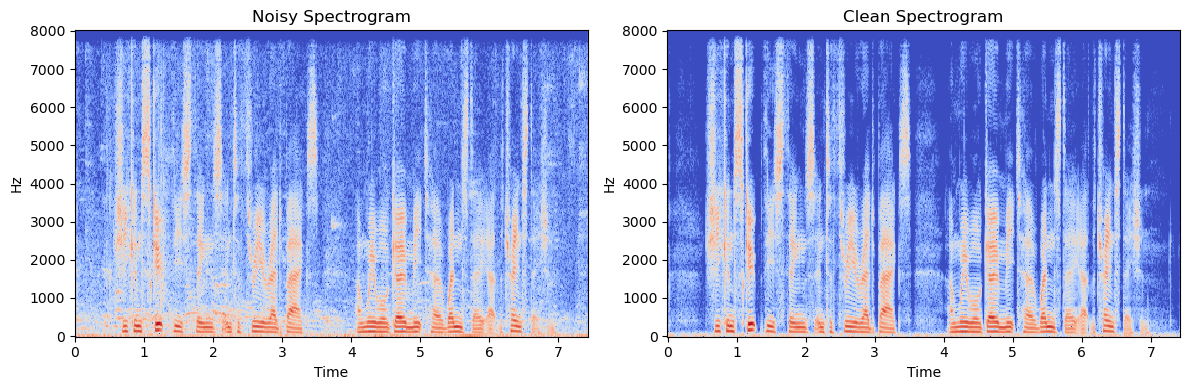

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
librosa.display.specshow(noisy_spec, sr=16000, hop_length=128, x_axis='time', y_axis='hz')
plt.title("Noisy Spectrogram")

plt.subplot(1, 2, 2)
librosa.display.specshow(clean_spec, sr=16000, hop_length=128, x_axis='time', y_axis='hz')
plt.title("Clean Spectrogram")

plt.tight_layout()
plt.show()

In [ ]:
from torch.utils.data import Dataset
import os
import torch
import librosa
import numpy as np

class SpeechDataset(Dataset):
    def __init__(self, clean_dir, noisy_dir, sr=16000, n_fft=512, hop_length=128, target_len=400):
        self.clean_files = sorted(os.listdir(clean_dir))
        self.noisy_files = sorted(os.listdir(noisy_dir))
        self.clean_dir = clean_dir
        self.noisy_dir = noisy_dir
        self.sr = sr
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.target_len = target_len

    def pad_tensor(self, tensor):
        pad_len = self.target_len - tensor.shape[0]
        if pad_len > 0:
            padding = torch.zeros((pad_len, tensor.shape[1]))
            tensor = torch.cat([tensor, padding], dim=0)
        else:
            tensor = tensor[:self.target_len, :]
        return tensor

    def normalize(self, spec):
        return (spec - np.min(spec)) / (np.max(spec) - np.min(spec) + 1e-8)

    def __len__(self):
        return len(self.clean_files)

    def __getitem__(self, idx):
        clean_path = os.path.join(self.clean_dir, self.clean_files[idx])
        noisy_path = os.path.join(self.noisy_dir, self.noisy_files[idx])

        clean, _ = librosa.load(clean_path, sr=self.sr)
        noisy, _ = librosa.load(noisy_path, sr=self.sr)

        clean_spec = librosa.amplitude_to_db(np.abs(librosa.stft(clean, n_fft=self.n_fft, hop_length=self.hop_length)))
        noisy_spec = librosa.amplitude_to_db(np.abs(librosa.stft(noisy, n_fft=self.n_fft, hop_length=self.hop_length)))

        clean_spec = self.normalize(clean_spec)
        noisy_spec = self.normalize(noisy_spec)

        clean_tensor = torch.tensor(clean_spec.T, dtype=torch.float32)
        noisy_tensor = torch.tensor(noisy_spec.T, dtype=torch.float32)

        clean_tensor = self.pad_tensor(clean_tensor)
        noisy_tensor = self.pad_tensor(noisy_tensor)

        return noisy_tensor, clean_tensor


In [ ]:
train_dataset = SpeechDataset(
    clean_dir="clean/clean_trainset_28spk_wav",
    noisy_dir="noisy/noisy_trainset_28spk_wav",
    target_len=400
)

test_dataset = SpeechDataset(
    clean_dir="clean/clean_testset_wav",
    noisy_dir="noisy/noisy_testset_wav",
    target_len=400
)

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [ ]:
noisy_batch, clean_batch = next(iter(train_loader))


In [ ]:
# Get one sample from the training dataset
noisy_tensor, clean_tensor = train_dataset[0]  # First training sample


In [ ]:
# Convert to (frequency, time) for plotting
noisy_spec = noisy_tensor.T
clean_spec = clean_tensor.T


In [ ]:
print("Noisy min/max:", noisy_tensor.min().item(), noisy_tensor.max().item())
print("Clean min/max:", clean_tensor.min().item(), clean_tensor.max().item())


Noisy min/max: 0.0 1.0
Clean min/max: 0.0 1.0


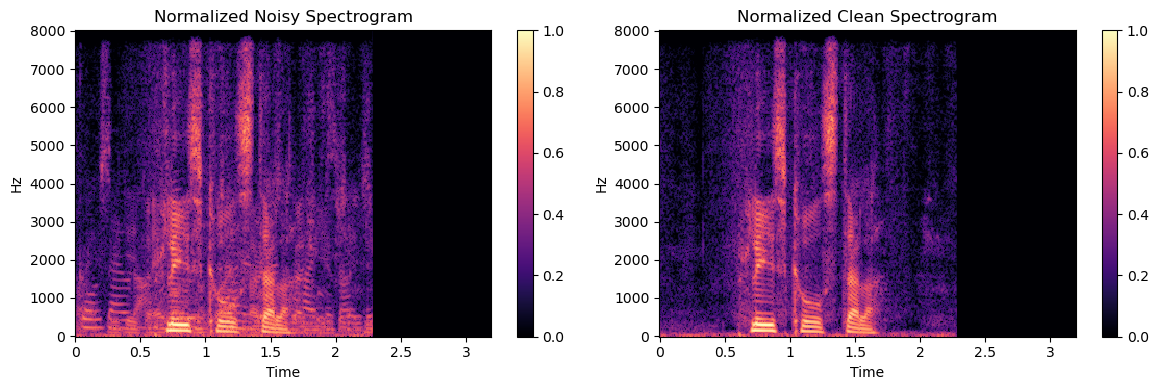

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Get one normalized & padded sample
noisy_tensor, clean_tensor = train_dataset[0]

# Convert to (frequency, time) and then to NumPy arrays
noisy_spec = noisy_tensor.T.numpy()
clean_spec = clean_tensor.T.numpy()

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
librosa.display.specshow(noisy_spec, sr=16000, hop_length=128, x_axis='time', y_axis='hz')
plt.title("Normalized Noisy Spectrogram")
plt.colorbar()

plt.subplot(1, 2, 2)
librosa.display.specshow(clean_spec, sr=16000, hop_length=128, x_axis='time', y_axis='hz')
plt.title("Normalized Clean Spectrogram")
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
def pad_tensor(tensor, target_len):
    pad_len = target_len - tensor.shape[0]
    if pad_len > 0:
        padding = torch.zeros((pad_len, tensor.shape[1]))
        tensor = torch.cat([tensor, padding], dim=0)
    else:
        tensor = tensor[:target_len, :]
    return tensor

In [ ]:
from torch.utils.data import Dataset
import os
import torch
import librosa
import numpy as np

class SpeechDataset(Dataset):
    def __init__(self, clean_dir, noisy_dir, sr=16000, n_fft=512, hop_length=128, target_len=400):
        self.clean_files = sorted(os.listdir(clean_dir))
        self.noisy_files = sorted(os.listdir(noisy_dir))
        self.clean_dir = clean_dir
        self.noisy_dir = noisy_dir
        self.sr = sr
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.target_len = target_len  # target time dimension after padding

    def pad_tensor(self, tensor):
        pad_len = self.target_len - tensor.shape[0]
        if pad_len > 0:
            padding = torch.zeros((pad_len, tensor.shape[1]))
            tensor = torch.cat([tensor, padding], dim=0)
        else:
            tensor = tensor[:self.target_len, :]
        return tensor

    def __len__(self):
        return len(self.clean_files)

    def __getitem__(self, idx):
        clean_path = os.path.join(self.clean_dir, self.clean_files[idx])
        noisy_path = os.path.join(self.noisy_dir, self.noisy_files[idx])

        clean, _ = librosa.load(clean_path, sr=self.sr)
        noisy, _ = librosa.load(noisy_path, sr=self.sr)

        clean_spec = librosa.amplitude_to_db(np.abs(librosa.stft(clean, n_fft=self.n_fft, hop_length=self.hop_length)))
        noisy_spec = librosa.amplitude_to_db(np.abs(librosa.stft(noisy, n_fft=self.n_fft, hop_length=self.hop_length)))

        clean_tensor = torch.tensor(clean_spec.T, dtype=torch.float32)
        noisy_tensor = torch.tensor(noisy_spec.T, dtype=torch.float32)

        # Apply padding here
        clean_tensor = self.pad_tensor(clean_tensor)
        noisy_tensor = self.pad_tensor(noisy_tensor)

        return noisy_tensor, clean_tensor

In [ ]:
clean_dir = "clean/clean_trainset_28spk_wav"
noisy_dir = "noisy/noisy_trainset_28spk_wav"

dataset = SpeechDataset(clean_dir, noisy_dir, target_len=400)
loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
pip install conformer

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import torch.nn as nn
from conformer import ConformerBlock  # Make sure conformer library is installed

class ConformerGenerator(nn.Module):
    def __init__(self, input_dim=257, hidden_dim=256, n_layers=4):
        super().__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.conformers = nn.Sequential(*[
            ConformerBlock(
                dim=hidden_dim,
                dim_head=64,
                heads=4,
                ff_mult=4,
                conv_expansion_factor=2,
                conv_kernel_size=7
            ) for _ in range(n_layers)
        ])
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        """
        x: (batch, time, freq_bins)
        """
        x = self.encoder(x)
        x = self.conformers(x)
        x = self.decoder(x)
        return x


In [ ]:
generator = ConformerGenerator()


In [ ]:
import torch.nn as nn
import torch

class Discriminator(nn.Module):
    def __init__(self, input_dim=257, hidden_dim=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        # x shape: (batch, time, features)
        # Average over time dimension
        x = torch.mean(x, dim=1)  # shape: (batch, features)
        return self.model(x)      # shape: (batch, 1)


In [ ]:
generator = ConformerGenerator()
discriminator = Discriminator()


In [ ]:
from torch.utils.data import Subset

small_dataset = Subset(train_dataset, list(range(20)))  # First 20 samples
loader = DataLoader(small_dataset, batch_size=2, shuffle=True)


In [ ]:
import torch.nn as nn
import torch

optimizer_g = torch.optim.Adam(generator.parameters(), lr=1e-4)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
mse_loss = nn.MSELoss()

In [ ]:
num_epochs = 3  # just for fast testing

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()

    for noisy, clean in loader:
        # ➤ Forward pass
        enhanced = generator(noisy)

        # ➤ Train Discriminator
        score_real = discriminator(clean).detach()
        score_fake = discriminator(enhanced.detach())
        loss_d = mse_loss(score_fake, score_real)

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ➤ Train Generator
        score_fake = discriminator(enhanced)
        loss_g = mse_loss(enhanced, clean) + 0.1 * mse_loss(score_fake, score_real)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f"Epoch {epoch+1}: Generator Loss = {loss_g.item():.4f}, Discriminator Loss = {loss_d.item():.4f}")

Epoch 1: Generator Loss = 0.0873, Discriminator Loss = 0.0001
Epoch 2: Generator Loss = 0.0452, Discriminator Loss = 0.0001
Epoch 3: Generator Loss = 0.0301, Discriminator Loss = 0.0001


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim=257, hidden_dim=256):  # increased
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        x = torch.mean(x, dim=1)  # avg over time
        return self.model(x)


In [ ]:
num_epochs = 3  # just for fast testing

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()

    for noisy, clean in loader:
        # ➤ Forward pass
        enhanced = generator(noisy)

        # ➤ Train Discriminator
        score_real = discriminator(clean).detach()
        score_fake = discriminator(enhanced.detach())
        loss_d = mse_loss(score_fake, score_real)

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ➤ Train Generator
        score_fake = discriminator(enhanced)
        loss_g = mse_loss(enhanced, clean) + 0.1 * mse_loss(score_fake, score_real)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f"Epoch {epoch+1}: Generator Loss = {loss_g.item():.4f}, Discriminator Loss = {loss_d.item():.4f}")

Epoch 1: Generator Loss = 0.0286, Discriminator Loss = 0.0002
Epoch 2: Generator Loss = 0.0215, Discriminator Loss = 0.0001
Epoch 3: Generator Loss = 0.0239, Discriminator Loss = 0.0003


In [ ]:
# Replace MSE loss with this:
bce = nn.BCEWithLogitsLoss()

# Inside the training loop, for the discriminator:
score_real = discriminator(clean)
score_fake = discriminator(enhanced.detach())

real_labels = torch.ones_like(score_real)
fake_labels = torch.zeros_like(score_fake)

loss_d = bce(score_real, real_labels) + bce(score_fake, fake_labels)


In [ ]:
score_fake = discriminator(enhanced)
loss_g = mse_loss(enhanced, clean) + 0.1 * bce(score_fake, real_labels)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim=257, hidden_dim=512):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        x = torch.mean(x, dim=1)
        return self.model(x)


In [ ]:
num_epochs = 3  # just for fast testing

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()

    for noisy, clean in loader:
        # ➤ Forward pass
        enhanced = generator(noisy)

        # ➤ Train Discriminator
        score_real = discriminator(clean).detach()
        score_fake = discriminator(enhanced.detach())
        loss_d = mse_loss(score_fake, score_real)

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ➤ Train Generator
        score_fake = discriminator(enhanced)
        loss_g = mse_loss(enhanced, clean) + 0.1 * mse_loss(score_fake, score_real)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f"Epoch {epoch+1}: Generator Loss = {loss_g.item():.4f}, Discriminator Loss = {loss_d.item():.4f}")

Epoch 1: Generator Loss = 0.0153, Discriminator Loss = 0.0001
Epoch 2: Generator Loss = 0.0149, Discriminator Loss = 0.0001
Epoch 3: Generator Loss = 0.0186, Discriminator Loss = 0.0002


In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils import spectral_norm

class Discriminator(nn.Module):
    def __init__(self, input_dim=257, hidden_dim=512):
        super().__init__()
        self.model = nn.Sequential(
            spectral_norm(nn.Linear(input_dim, hidden_dim)),
            nn.LeakyReLU(0.2),
            spectral_norm(nn.Linear(hidden_dim, hidden_dim)),
            nn.LeakyReLU(0.2),
            spectral_norm(nn.Linear(hidden_dim, 1))
        )

    def forward(self, x):
        x = torch.mean(x, dim=1)  # (batch, features)
        return self.model(x)  # Output shape: (batch, 1)


In [ ]:
generator = ConformerGenerator()
discriminator = Discriminator()

bce = nn.BCEWithLogitsLoss()
mse_loss = nn.MSELoss()

optimizer_g = torch.optim.Adam(generator.parameters(), lr=1e-4)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=1e-4)

num_epochs = 3

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()
    
    for noisy, clean in loader:
        # ➤ 1. Generator forward
        enhanced = generator(noisy)

        # ➤ 2. Train Discriminator
        score_real = discriminator(clean)
        score_fake = discriminator(enhanced.detach())

        # Label smoothing: 0.9 for real, 0.1 for fake
        real_labels = torch.full_like(score_real, 0.9)
        fake_labels = torch.full_like(score_fake, 0.1)

        loss_d = bce(score_real, real_labels) + bce(score_fake, fake_labels)

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ➤ 3. Train Generator
        score_fake = discriminator(enhanced)
        loss_g = mse_loss(enhanced, clean) + 0.1 * bce(score_fake, real_labels)  # trick: fool D

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f"\nEpoch {epoch+1}: Generator Loss = {loss_g.item():.4f}, Discriminator Loss = {loss_d.item():.4f}")
    print("Discriminator Output → Real:", score_real[:3].view(-1).tolist())
    print("Discriminator Output → Fake:", score_fake[:3].view(-1).tolist())



Epoch 1: Generator Loss = 0.1529, Discriminator Loss = 1.3638
Discriminator Output → Real: [0.20970319211483002, 0.23897458612918854]
Discriminator Output → Fake: [0.12963111698627472, 0.13879039883613586]

Epoch 2: Generator Loss = 0.1048, Discriminator Loss = 1.4291
Discriminator Output → Real: [0.20012815296649933, 0.14572228491306305]
Discriminator Output → Fake: [0.24753741919994354, 0.21077904105186462]

Epoch 3: Generator Loss = 0.1024, Discriminator Loss = 1.4353
Discriminator Output → Real: [0.02260999009013176, -0.013685295358300209]
Discriminator Output → Fake: [0.10003060102462769, 0.1013597846031189]


In [ ]:
# Put generator in evaluation mode
generator.eval()

# Get a sample from test set (or small_dataset if testing)
noisy_spec, clean_spec = test_dataset[0]  # shape: (time, freq)
noisy_spec = noisy_spec.unsqueeze(0)      # Add batch dimension

# Generate enhanced spectrogram
with torch.no_grad():
    enhanced_spec = generator(noisy_spec)  # shape: (1, time, freq)


In [ ]:
import librosa
import numpy as np

def spec_to_audio(spec_tensor, sr=16000, n_fft=512, hop_length=128):
    # Convert (1, time, freq) → (freq, time)
    spec = spec_tensor.squeeze(0).T.numpy()

    # Reverse dB and normalization (assume spec is between 0 and 1)
    mag = librosa.db_to_amplitude(spec * 80.0 - 80.0)  # Scale back to dB

    # Use Griffin-Lim to estimate phase
    audio = librosa.griffinlim(mag, n_fft=n_fft, hop_length=hop_length)
    return audio


In [ ]:
enhanced_audio = spec_to_audio(enhanced_spec)


In [ ]:
import IPython.display as ipd
ipd.Audio(enhanced_audio, rate=16000)


In [ ]:
generator = ConformerGenerator()
discriminator = Discriminator()

optimizer_g = torch.optim.Adam(generator.parameters(), lr=1e-4)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
mse_loss = nn.MSELoss()

num_epochs = 10

for epoch in range(num_epochs):
    for noisy, clean in loader:
        # ➤ 1. Forward pass through generator
        enhanced = generator(noisy)

        # ➤ 2. Train Discriminator
        score_real = discriminator(clean).detach()
        score_fake = discriminator(enhanced.detach())

        loss_d = mse_loss(score_fake, score_real)

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ➤ 3. Train Generator
        score_fake = discriminator(enhanced)
        loss_g = mse_loss(enhanced, clean) + 0.1 * mse_loss(score_fake, score_real)

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f"Epoch {epoch+1}: Generator Loss = {loss_g.item():.4f}, Discriminator Loss = {loss_d.item():.4f}")

Epoch 1: Generator Loss = 0.0930, Discriminator Loss = 0.0001
Epoch 2: Generator Loss = 0.0442, Discriminator Loss = 0.0014
Epoch 3: Generator Loss = 0.0336, Discriminator Loss = 0.0012
Epoch 4: Generator Loss = 0.0213, Discriminator Loss = 0.0002
Epoch 5: Generator Loss = 0.0297, Discriminator Loss = 0.0008
Epoch 6: Generator Loss = 0.0189, Discriminator Loss = 0.0007
Epoch 7: Generator Loss = 0.0159, Discriminator Loss = 0.0019
Epoch 8: Generator Loss = 0.0191, Discriminator Loss = 0.0021
Epoch 9: Generator Loss = 0.0156, Discriminator Loss = 0.0146
Epoch 10: Generator Loss = 0.0130, Discriminator Loss = 0.0036


In [ ]:
print("D → Real:", score_real[:3].view(-1).tolist())
print("D → Fake:", score_fake[:3].view(-1).tolist())


D → Real: [0.7909700870513916, 0.8088648915290833]
D → Fake: [0.7713711857795715, 0.7570196986198425]


In [ ]:
import torch.nn as nn
import torch

class Discriminator(nn.Module):
    def __init__(self, input_dim=257):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        # Average across time dimension → shape becomes (batch, features)
        x = torch.mean(x, dim=1)
        return self.model(x)


In [ ]:
generator = ConformerGenerator()
discriminator = Discriminator()  # ← uses the deeper version now

bce = nn.BCEWithLogitsLoss()
mse_loss = nn.MSELoss()

optimizer_g = torch.optim.Adam(generator.parameters(), lr=1e-4)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=1e-4)

num_epochs = 500

for epoch in range(num_epochs):
    generator.train()
    discriminator.train()
    
    for noisy, clean in loader:
        # ➤ 1. Generator forward
        enhanced = generator(noisy)

        # ➤ 2. Train Discriminator
        score_real = discriminator(clean)
        score_fake = discriminator(enhanced.detach())

        # Label smoothing: 0.9 for real, 0.1 for fake
        real_labels = torch.full_like(score_real, 0.9)
        fake_labels = torch.full_like(score_fake, 0.1)

        loss_d = bce(score_real, real_labels) + bce(score_fake, fake_labels)

        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ➤ 3. Train Generator
        score_fake = discriminator(enhanced)
        loss_g = mse_loss(enhanced, clean) + 0.1 * bce(score_fake, real_labels)  # trick: fool D

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    print(f"\nEpoch {epoch+1}: Generator Loss = {loss_g.item():.4f}, Discriminator Loss = {loss_d.item():.4f}")
    print("Discriminator Output → Real:", score_real[:3].view(-1).tolist())
    print("Discriminator Output → Fake:", score_fake[:3].view(-1).tolist())



Epoch 1: Generator Loss = 0.1742, Discriminator Loss = 1.3471
Discriminator Output → Real: [0.10231123119592667, 0.10469486564397812]
Discriminator Output → Fake: [-0.021540528163313866, -0.011449169367551804]

Epoch 2: Generator Loss = 0.1157, Discriminator Loss = 1.3694
Discriminator Output → Real: [0.11892655491828918, 0.1195496991276741]
Discriminator Output → Fake: [0.06004932150244713, 0.0568842850625515]

Epoch 3: Generator Loss = 0.1042, Discriminator Loss = 1.4376
Discriminator Output → Real: [0.03961310163140297, 0.04398941993713379]
Discriminator Output → Fake: [0.1420244723558426, 0.14347043633460999]

Epoch 4: Generator Loss = 0.1012, Discriminator Loss = 1.4169
Discriminator Output → Real: [-0.04368044063448906, -0.05305403098464012]
Discriminator Output → Fake: [0.014803553931415081, 0.013589615002274513]

Epoch 5: Generator Loss = 0.0993, Discriminator Loss = 1.3882
Discriminator Output → Real: [-0.05146494135260582, -0.07420407235622406]
Discriminator Output → Fake: [

In [ ]:
generator.eval()
noisy_spec, clean_spec = test_dataset[0]
noisy_spec = noisy_spec.unsqueeze(0)

with torch.no_grad():
    enhanced_spec = generator(noisy_spec)


In [ ]:
def spec_to_audio(spec_tensor, sr=16000, n_fft=512, hop_length=128):
    spec = spec_tensor.squeeze(0).T.numpy()  # shape: [freq, time]
    spec = spec * 80.0 - 80.0                # denormalize
    mag = librosa.db_to_amplitude(spec)
    audio = librosa.griffinlim(mag, n_fft=n_fft, hop_length=hop_length)
    return audio

enhanced_audio = spec_to_audio(enhanced_spec)


In [ ]:
import IPython.display as ipd
ipd.Audio(enhanced_audio, rate=16000)


In [ ]:
import matplotlib.pyplot as plt
import librosa.display

def plot_specs(noisy, clean, enhanced, sr=16000, hop_length=128):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

    # Noisy
    axs[0].set_title("Noisy Spectrogram")
    librosa.display.specshow(noisy.squeeze(0).T.cpu().numpy(), sr=sr, hop_length=hop_length, ax=axs[0])

    # Clean
    axs[1].set_title("Clean Spectrogram")
    librosa.display.specshow(clean.T.cpu().numpy(), sr=sr, hop_length=hop_length, ax=axs[1])

    # Enhanced
    axs[2].set_title("Enhanced Spectrogram")
    librosa.display.specshow(enhanced.squeeze(0).T.cpu().numpy(), sr=sr, hop_length=hop_length, ax=axs[2])

    plt.tight_layout()
    plt.show()


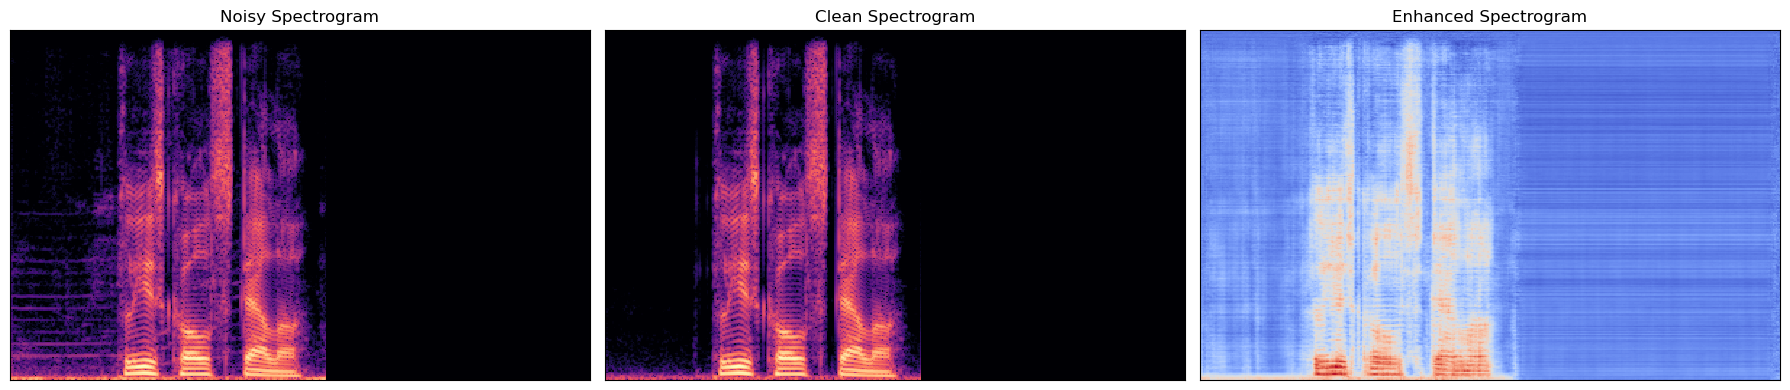

In [ ]:
plot_specs(noisy_spec, clean_spec, enhanced_spec)


In [ ]:
pip install torchmetrics pystoi


  Using cached torchmetrics-1.7.3-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
Using cached torchmetrics-1.7.3-py3-none-any.whl (962 kB)
Using cached lightning_utilities-0.14.3-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import numpy as np
from torchmetrics.audio import SignalNoiseRatio
from pystoi.stoi import stoi

def align_signals(clean, enhanced):
    min_len = min(len(clean), len(enhanced))
    return clean[:min_len], enhanced[:min_len]

def calculate_scores_snr_stoi(clean_audio, enhanced_audio, sr=16000):
    # Align lengths
    clean_aligned, enhanced_aligned = align_signals(clean_audio, enhanced_audio)

    # Convert to tensors for SNR
    clean_tensor = torch.tensor(clean_aligned, dtype=torch.float32)
    enhanced_tensor = torch.tensor(enhanced_aligned, dtype=torch.float32)

    # SNR (dB)
    snr_metric = SignalNoiseRatio()
    snr_score = snr_metric(enhanced_tensor, clean_tensor).item()

    # STOI (0 to 1, higher is better)
    stoi_score = stoi(clean_aligned, enhanced_aligned, sr, extended=False)

    return snr_score, stoi_score


In [ ]:
snr, stoi_val = calculate_scores_snr_stoi(clean_audio, enhanced_audio)

print(f"SNR  : {snr:.2f} dB")
print(f"STOI : {stoi_val:.4f}")


SNR  : 0.00 dB
STOI : 0.2709
